# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 분석 프로세스 => 목적설정, 데이터 획득, 전처리, 탐색, 변환, 축소, 모델 생성, 모델 평가, 모델 적용(배포)
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수(종속변수 라벨)가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                  - 랜덤포레스트 
                    - 성능 우수(결정트리 여러개 사용), 차원높고 희소한 데이터에는 잘 동작 안함
                  - 부스팅
                    - 랜포와 유사하게 성능 우수하나, 훈련 시간이 오래 걸림, 매개변수 튜닝이 중요
                  - 배깅
                    -
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀(L2규제)
                    - 라쏘 회귀(L1규제)
                    - 엘라스틱넷 회귀(L1+L2)
                - 비선형회귀
                    - 다항회귀(polynomial regression)
            - 시계열 분석(독립변수가 시간, AR, MA, ARIMA)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집(병합군집)
                - 비계층적군집(K평균)
                - 밀도기반군집(DBSCAN)
                - 혼합분포군집
            - 연관분석(장바구니분석) => 지지도, 신뢰도, 향상도
    - 비정형데이터분석
        - 웹 마이닝
        - 텍스트 마이닝
        - 사회연결망분석(SNA)
- 모델 생성 구축
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE, R2
- 모델 적용
- 모델 성능 개선

In [13]:
import pandas as pd
import numpy as np

dataset = np.array([['kor', 70], ['math', 80]])
df = pd.DataFrame(dataset, columns=['class', 'score'])

df

# 데이터 쓰기
filepath = 'data/data1.csv'
df.to_csv(filepath, header=True, index=True, encoding='utf8')

# 데이터 읽기
print(pd.read_csv(filepath, na_values = 'NA', encoding='utf8'))

from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

iris.head()

iris.tail()

iris.info()

iris.describe()

iris.columns


   Unnamed: 0 class  score
0           0   kor     70
1           1  math     80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# 데이터 시각화(EDA, 기술통계)
# 막대그래프, 히스토그램, 상자수염그림(박스플롯), 산점도



type = <class 'pandas.core.frame.DataFrame'>
(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3

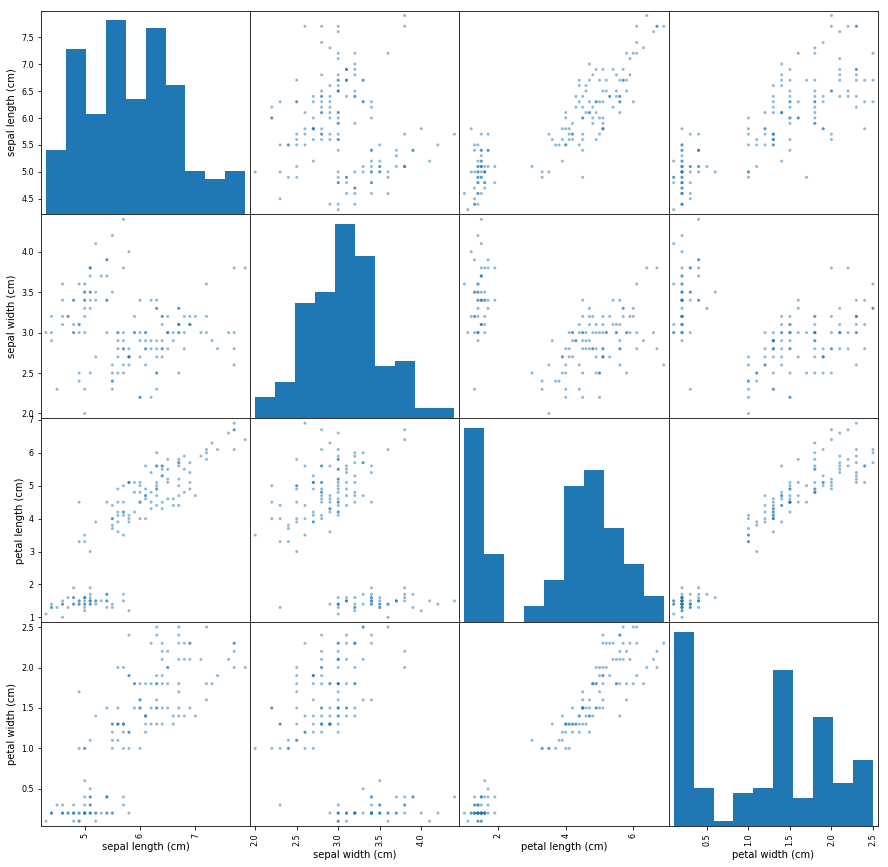

In [3]:
# 파이썬 기반 분류 어플리케이션 예시
## 전체 프로세스
## 데이터 수집 -> 데이터 탐색 및 준비 -> 모델 훈련 -> 모델 성능 평가 -> 모델 성능 개선

from sklearn.datasets import load_iris

# 데이터수집

# return_X_y => If True, returns (data, target) instead of a Bunch object. See below for more information about the data and target object.
# as_frame => If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric)
(data, target) = load_iris(return_X_y = True, as_frame = True) # 붓꽃 데이터 셋 로딩

print(f"type = {type(data)}")

# 데이터 탐색 및 준비

## 데이터 개수, 일부 확인
print(data.shape)
print(data.head())
print(data.describe())
print(data.isnull().sum())

# 결측값 처리
data.dropna()

## 산점도 행렬 표시
import pandas as pd

pd.plotting.scatter_matrix(
    data
    , figsize = (15,15)
)


## 훈련 준비 데이터셋 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data
    , target
    , random_state = 0
)

print(f'x_train={x_train.shape}')
print(f'y_train={y_train.shape}')

print(f'x_test={x_test.shape}')
print(f'y_test={y_test.shape}')

# 모델 훈련
## KNN 사용

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)

## 새로운 데이터에 대해 훈련된 모델로 예측
x_new = np.array([[5, 2.9, 1, 0.2]])

model_pred = model.predict(x_new)
print(f"예측={model_pred}")

# 모델 성능 평가
## 직접 계산
y_pred = model.predict(x_test)
print(f"테스트 셋 정확도={np.mean(y_pred == y_test):0.3f}")

## model.score 함수 이용
print(f"테스트 셋 정확도={model.score(x_test, y_test):0.3f}")

# 모델 성능 개선
